# **Import Libraries**

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython import display
import plotly.express as px
import datetime as dt
from prophet import Prophet
pd.set_option('display.max_rows',None)

# **Import Data**

In [232]:
data = pd.read_csv('/home/wilmer/Documentos/Codes/WORKSHOP/act1/data/training_dataset.csv')
data.columns = ['ds','y']
dataB = data.copy()['y']

data['ds'] = pd.to_datetime(data['ds'])

# Exploracion de los datos

In [233]:
data.describe()

,ds,y
count,253,253.000000
mean,2021-06-09 02:50:45.059288576,4075.739130
min,2021-02-01 00:00:00,355.000000
25%,2021-04-05 00:00:00,1265.000000
50%,2021-06-10 00:00:00,2719.000000
75%,2021-08-13 00:00:00,6644.000000
max,2021-10-15 00:00:00,15696.000000
std,NaN,3453.840341


<Axes: xlabel='y', ylabel='Count'>

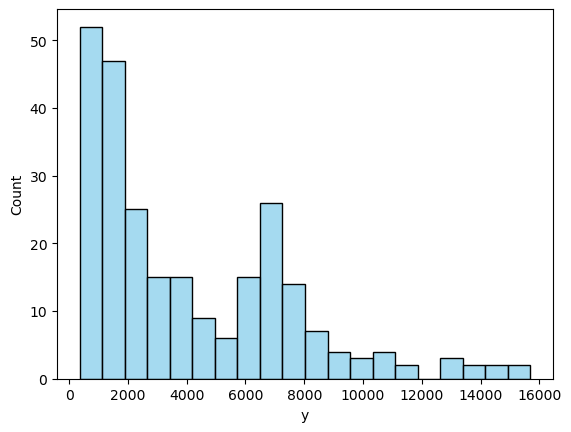

In [234]:
# Crear el histograma con Seaborn
sns.histplot(dataB, bins=20, kde=False, color='skyblue')

<Axes: ylabel='y'>

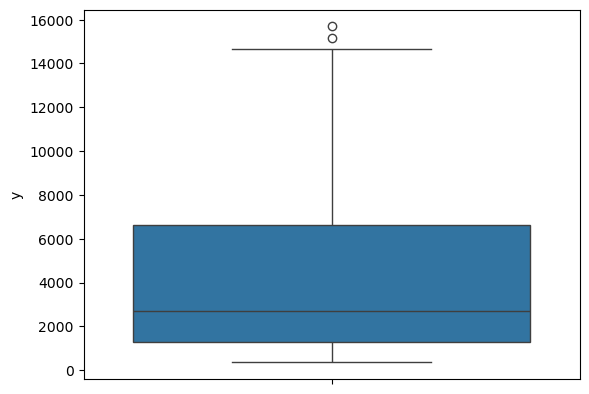

In [235]:
# Crear el boxplot
sns.boxplot(dataB)

In [236]:
# Split data into a training set and test set
split_date = dt.datetime(2021,10,1)

train_df = data[data.ds < split_date]
test_df = data[data.ds >= split_date]

In [237]:
# Crear y ajustar el modelo
model = Prophet()
model.fit(data)

# Crear un dataframe con fechas futuras para hacer pronósticos
future = model.make_future_dataframe(periods=17)  # Pronosticar 30 días adicionales
future = future.tail(17)
# Realizar el pronóstico
forecast = model.predict(future)
forecast = forecast[['ds','yhat']]
forecast.columns = ['ds','y']
forecast['y'] = forecast['y']
# fig2 = model.plot_components(forecast)

# concat
x_concat = pd.concat([train_df, forecast], axis=0, ignore_index=True)

17:45:21 - cmdstanpy - INFO - Chain [1] start processing
17:45:21 - cmdstanpy - INFO - Chain [1] done processing


In [238]:
y_test = test_df['y'].reset_index()['y']
y_pred = forecast['y'].reset_index()['y']

wape = (y_test - y_pred).abs().sum() / y_test.sum()
mape = (y_pred - y_test).abs().sum() / y_test.shape[0]
print("The WAPE is:", wape)
print("The MAPE is:", mape)

The WAPE is: 0.3500471560638099
The MAPE is: 3482.5958192017733


In [239]:
fig = px.line(data, x="ds", y="y", title='Bookings')
fig.show()

In [240]:
fig = px.line(x_concat, x="ds", y="y", title='Pronostico')
fig.show()

In [244]:
df = pd.read_csv('/home/wilmer/Documentos/Codes/WORKSHOP/act1/data/validation_dataset.csv')

forecast['y'] = forecast['y'].astype('int')
# forecast.to_excel('aaaaa.xlsx')

In [248]:
forecast.to_csv('validations_fill.csv')